In [1]:
%matplotlib nbagg

import warnings
warnings.filterwarnings("ignore")

from openpyxl import load_workbook 

import os
import matplotlib.pyplot as plt
import numpy as np

Archivos=sorted(os.listdir('Vigilancia_Depart'))
Leer=lambda archivo:load_workbook(filename = 'Vigilancia_Depart/'+archivo,read_only=True)

#Lista con los libros xlsx leidos:
Libros=map(Leer,Archivos[:5])

Value= lambda openpycell: openpycell.value
Gentoval=lambda openpycell: map(Value,openpycell)

#Matriz representativa de los xlsx [2009,2013]
MxLibros= [np.array(map(Gentoval,Libros[i]['Vigilancia Dep']['A0:BD1318'])) for i in range(len(Libros))]

In [2]:
#Ubicación de Bogotá:
UbiBog=[np.argwhere(MxLibros[i][:,1]=='BOGOTA') for i in range(len(Libros))]

In [3]:
#Fin del rango de enfermendades para Bogotá:
FinBog=[np.argwhere(MxLibros[i][:,1]=='BOLIVAR')-2 for i in range(len(Libros))]

<IPython.core.display.Javascript object>


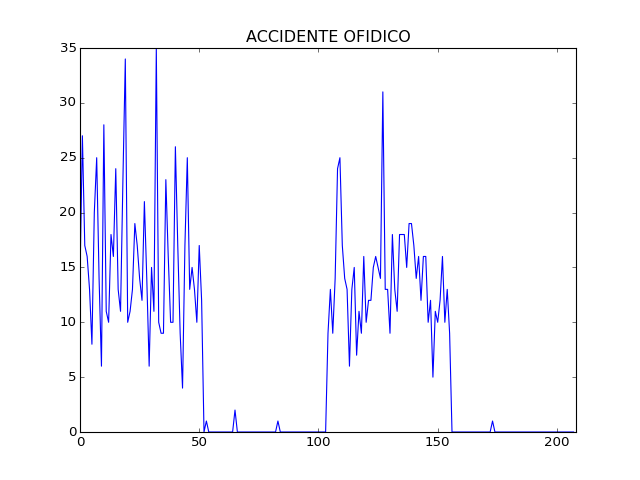

<IPython.core.display.Javascript object>


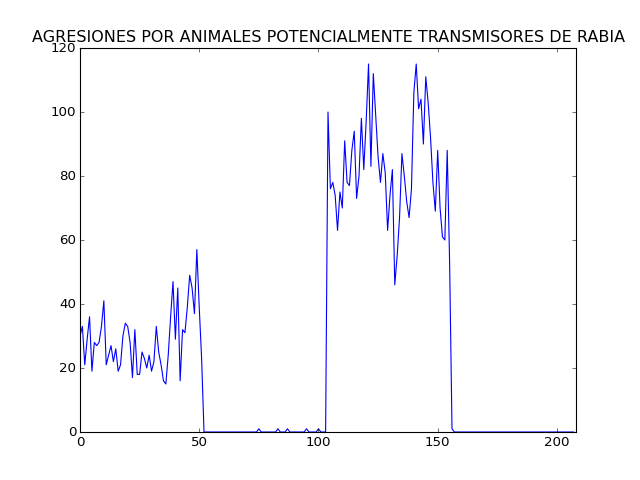

<IPython.core.display.Javascript object>


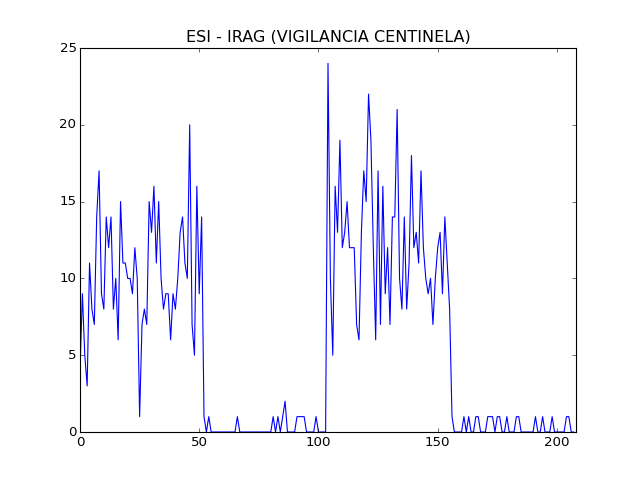

<IPython.core.display.Javascript object>


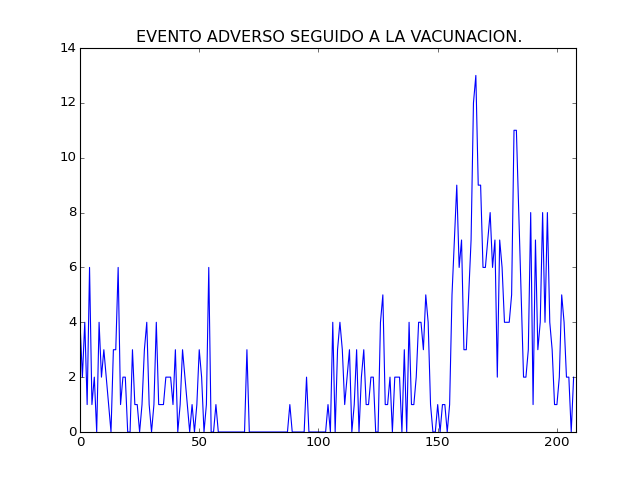

<IPython.core.display.Javascript object>


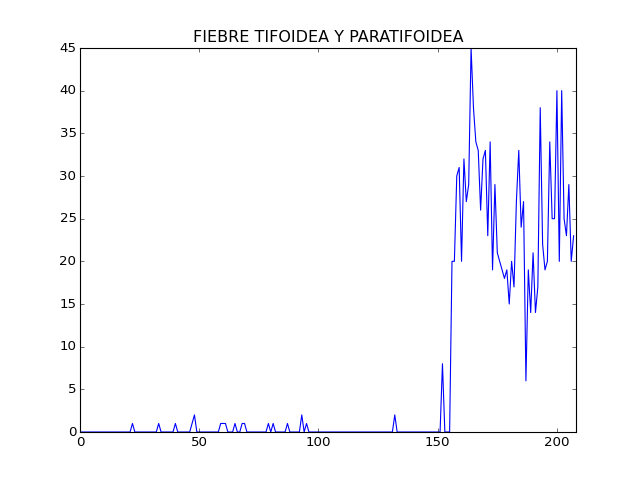

<IPython.core.display.Javascript object>


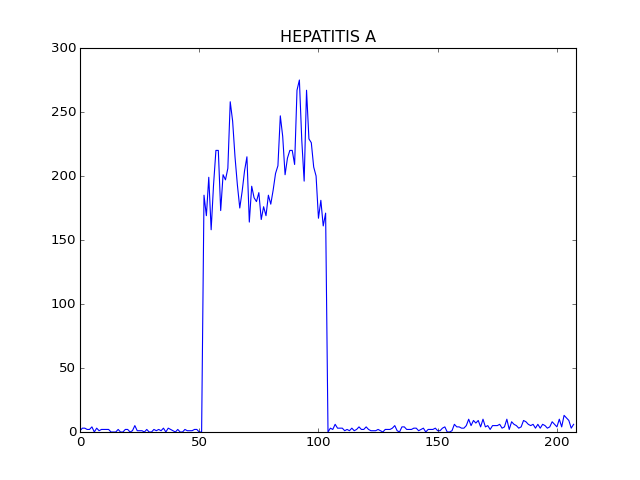

<IPython.core.display.Javascript object>


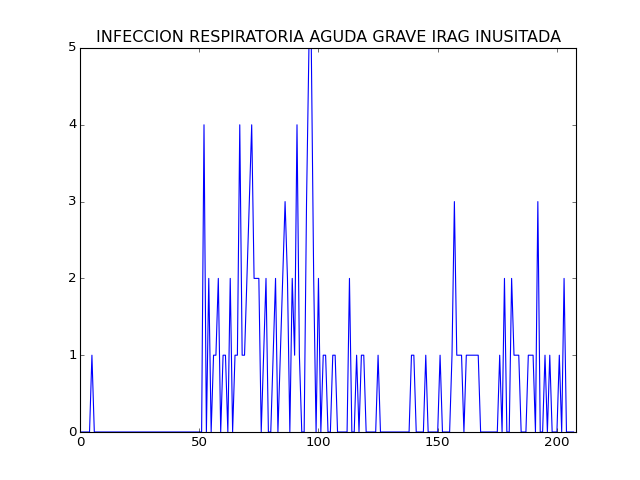

<IPython.core.display.Javascript object>


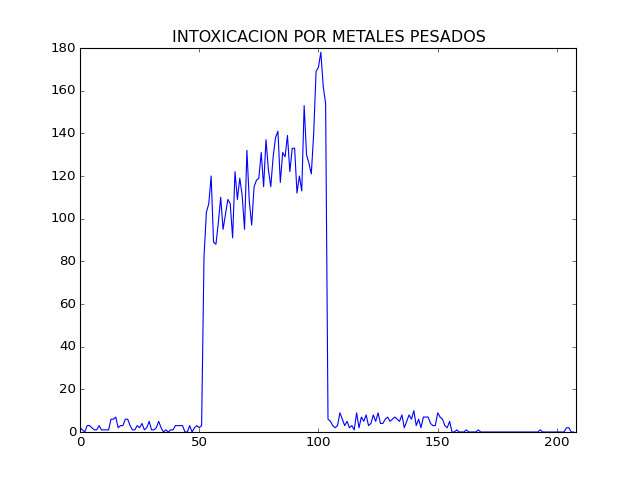

<IPython.core.display.Javascript object>


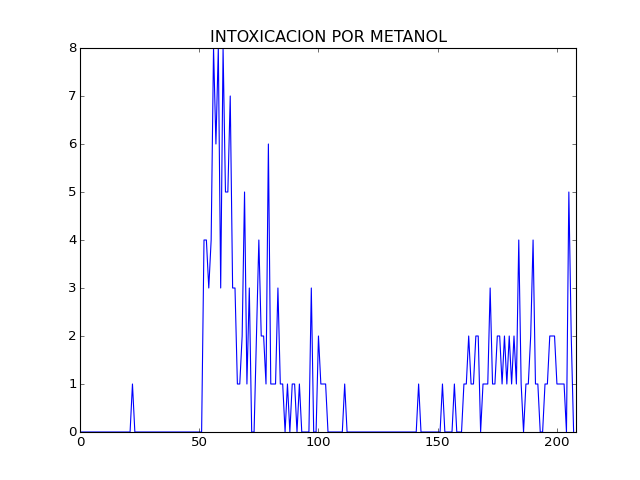

<IPython.core.display.Javascript object>


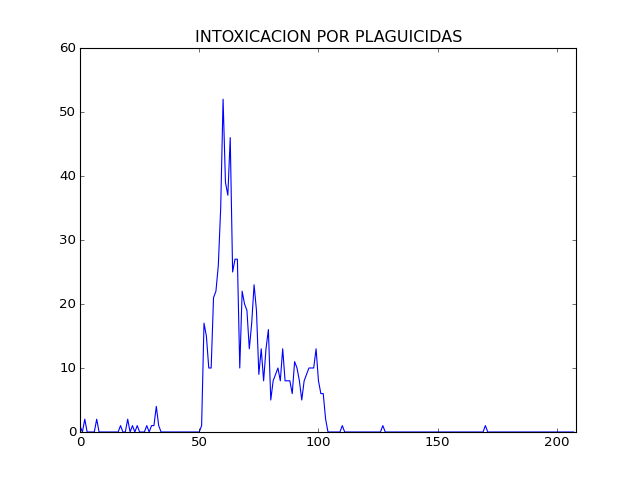

<IPython.core.display.Javascript object>


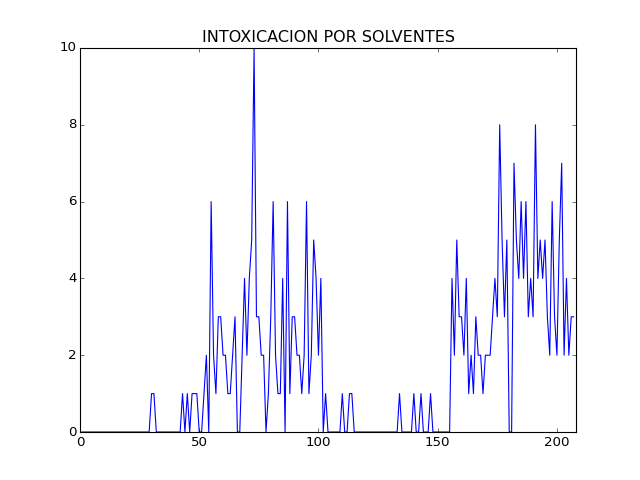

<IPython.core.display.Javascript object>


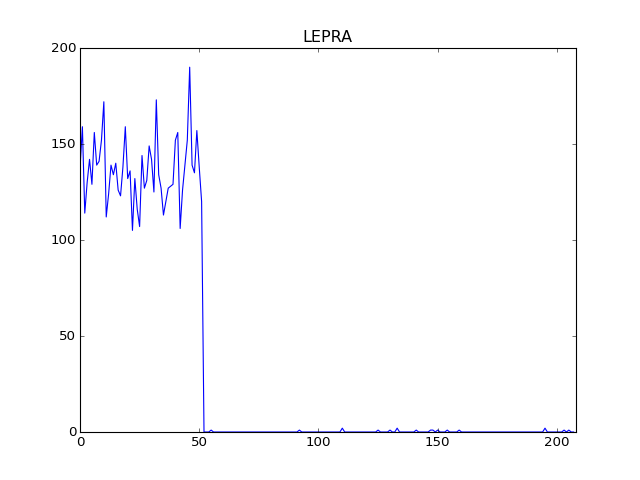

<IPython.core.display.Javascript object>


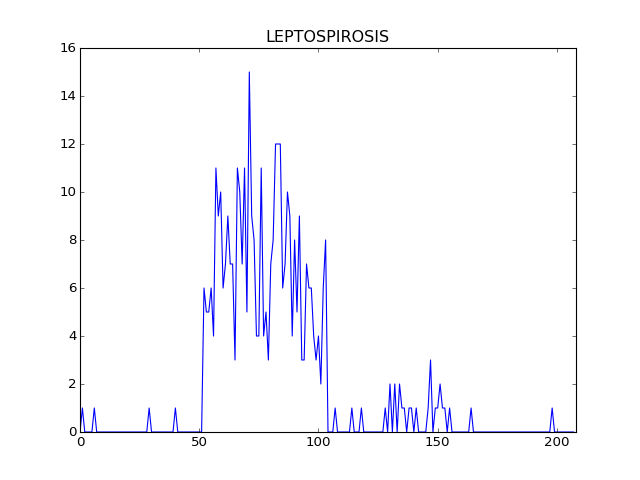

<IPython.core.display.Javascript object>


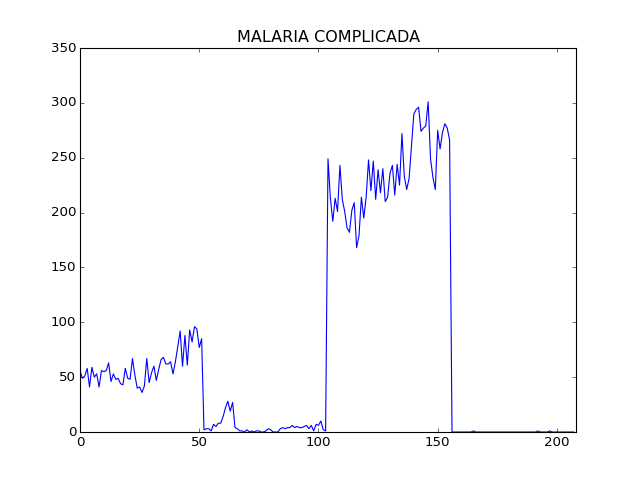

No se encontro MALARIA VIVAX en Vigilancia rutinaria Departamental 2011.xlsx


<IPython.core.display.Javascript object>


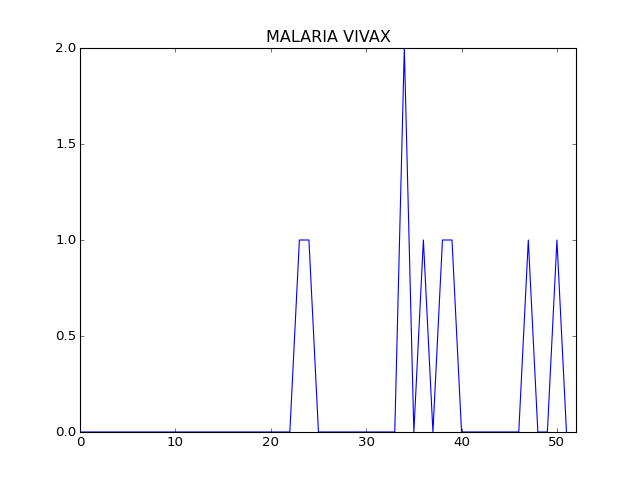

<IPython.core.display.Javascript object>


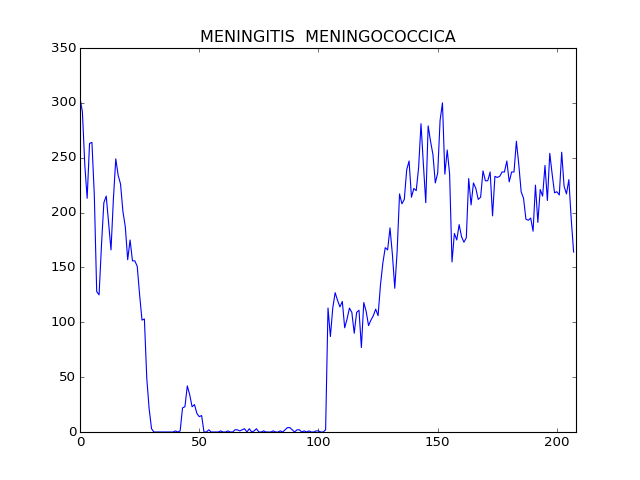

<IPython.core.display.Javascript object>


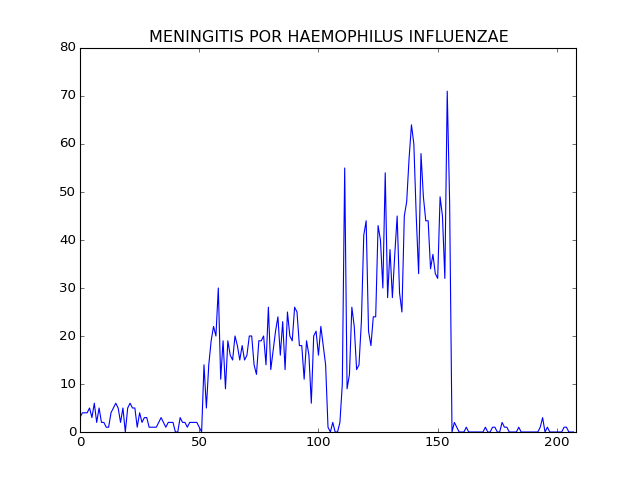

<IPython.core.display.Javascript object>


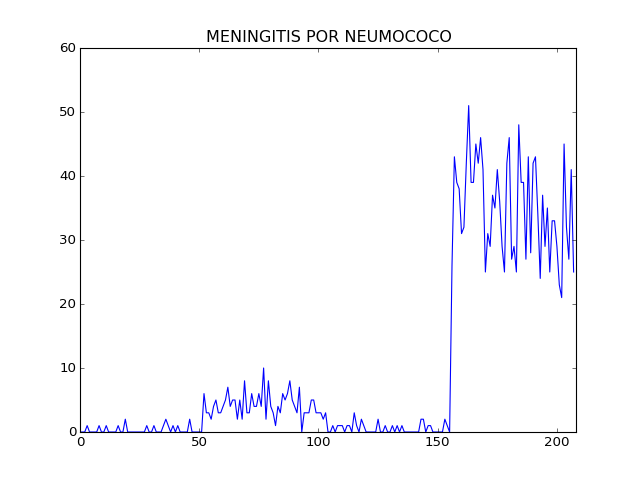

<IPython.core.display.Javascript object>


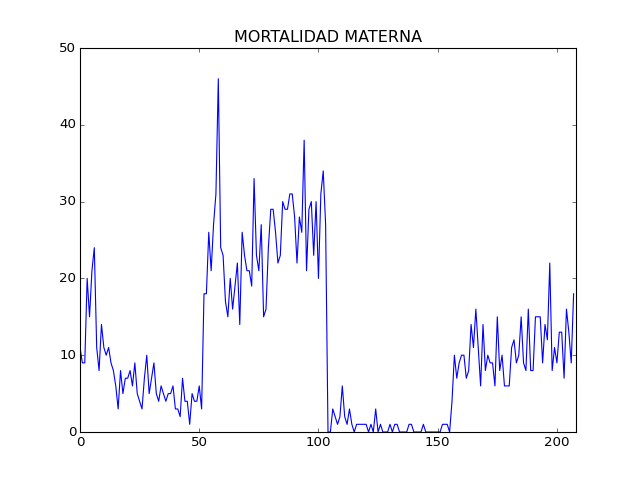

<IPython.core.display.Javascript object>


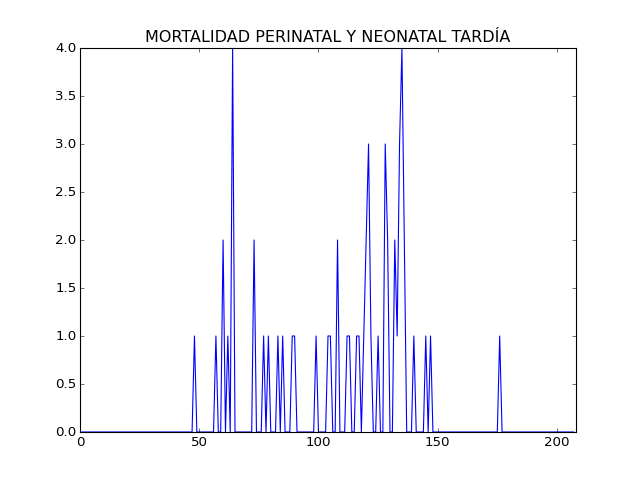

<IPython.core.display.Javascript object>


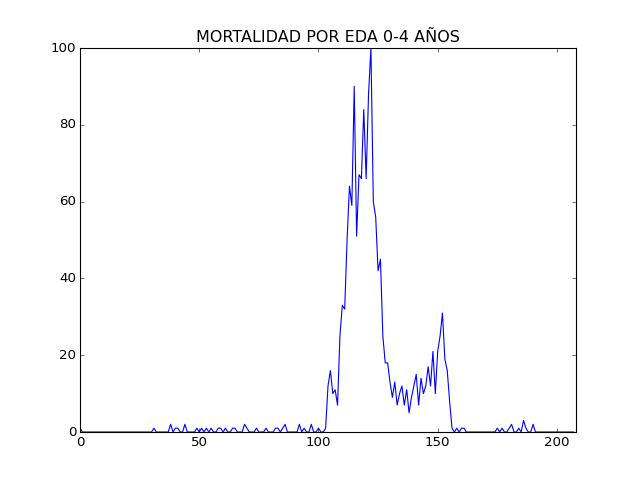

<IPython.core.display.Javascript object>


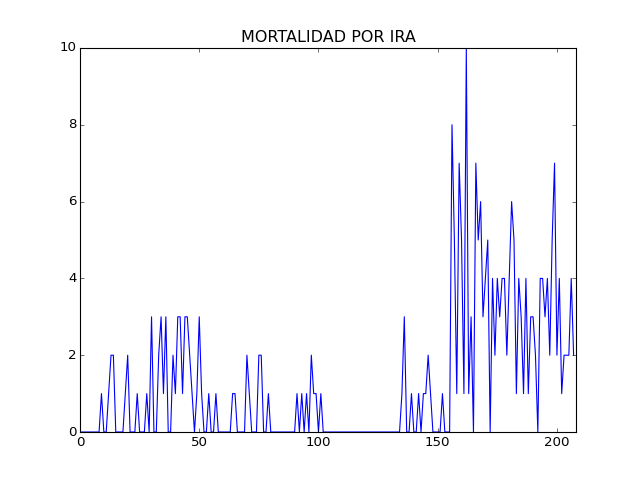

<IPython.core.display.Javascript object>


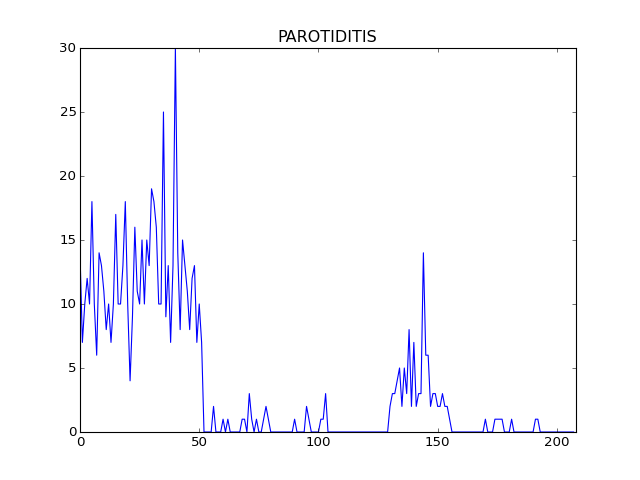

<IPython.core.display.Javascript object>


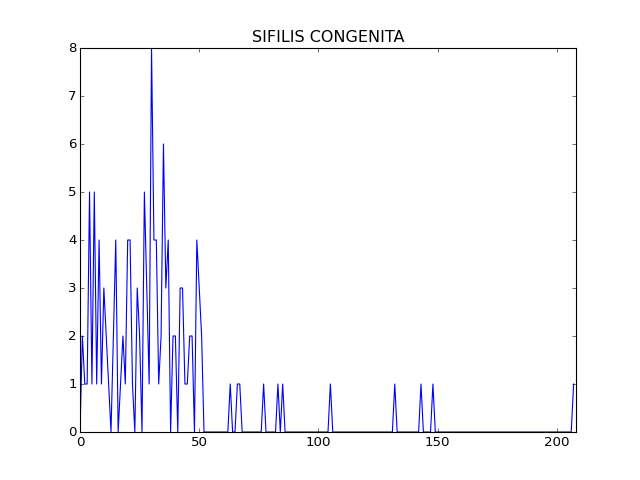

<IPython.core.display.Javascript object>


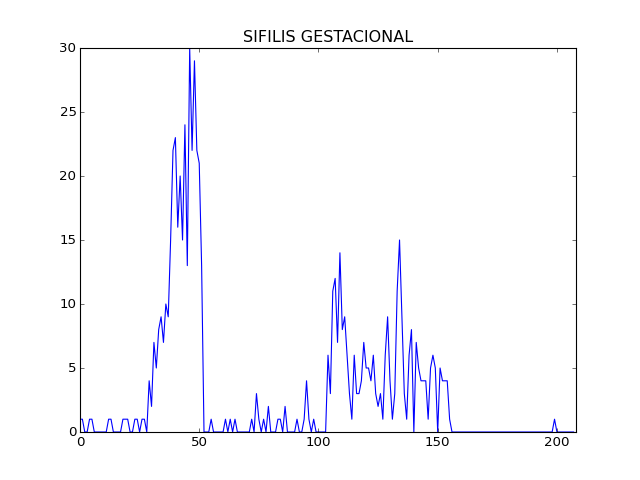

<IPython.core.display.Javascript object>


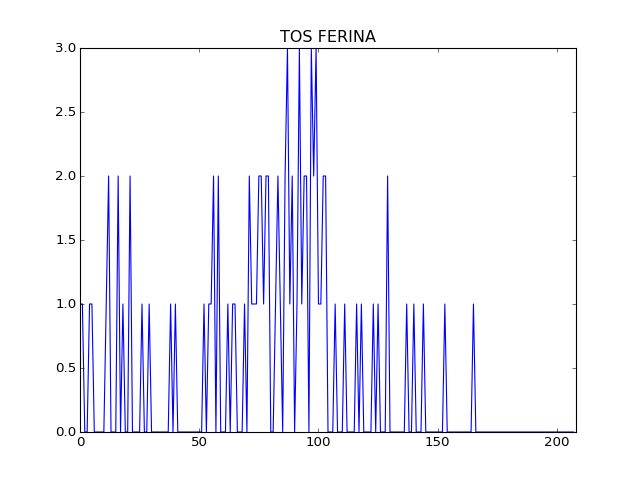

<IPython.core.display.Javascript object>


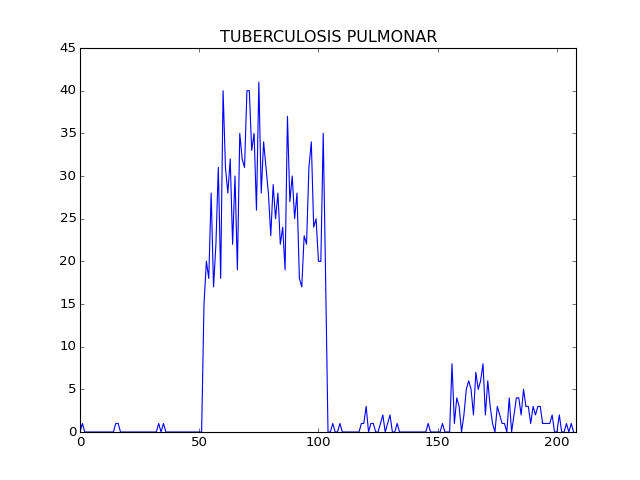

<IPython.core.display.Javascript object>


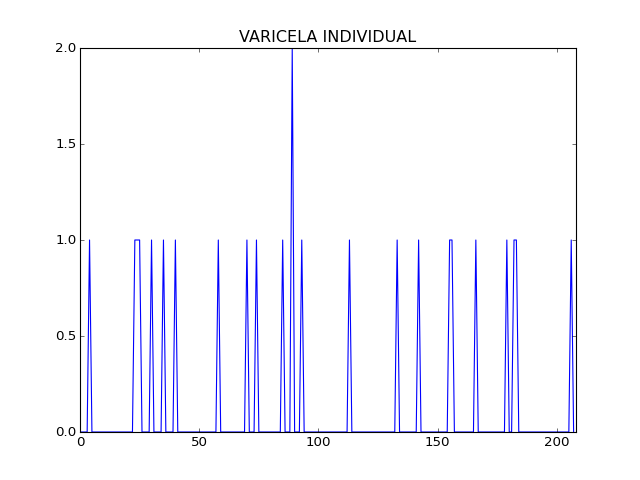

<IPython.core.display.Javascript object>


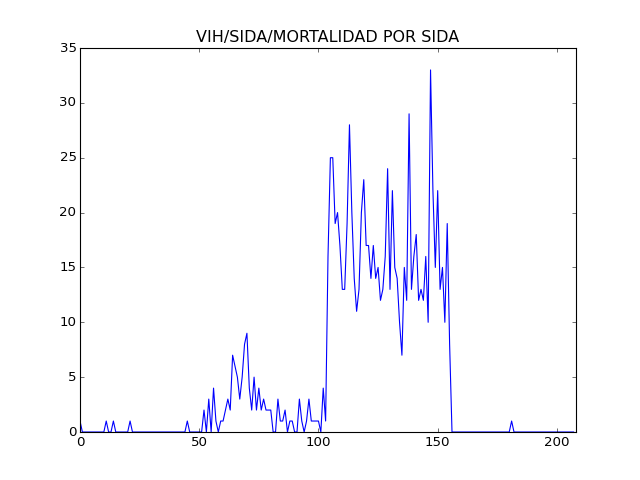

<IPython.core.display.Javascript object>


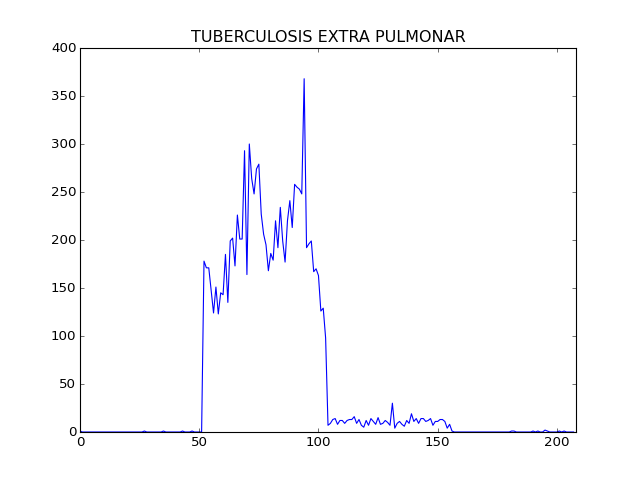

<IPython.core.display.Javascript object>


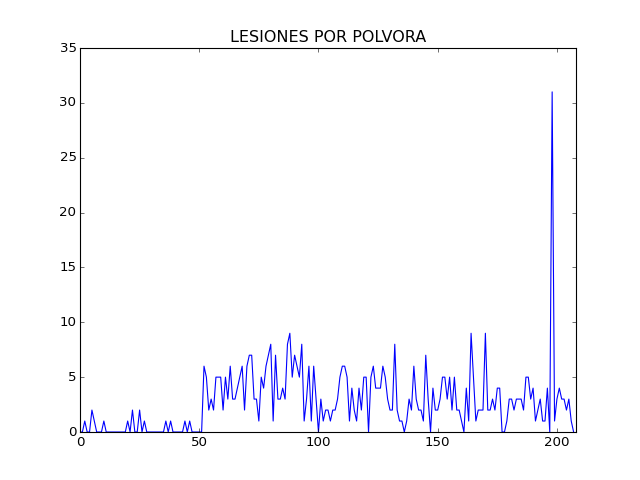

<IPython.core.display.Javascript object>


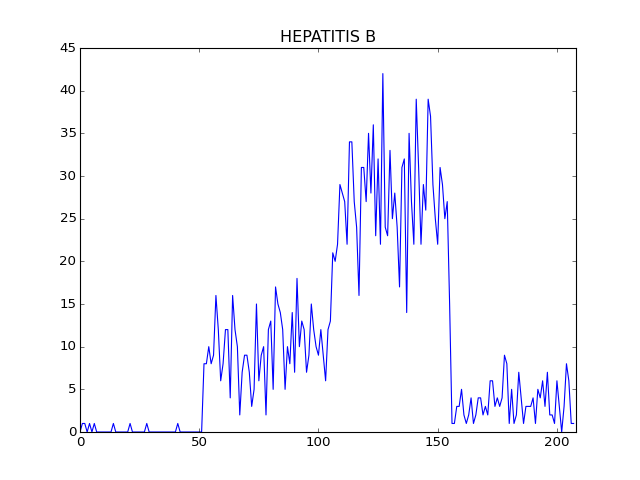

<IPython.core.display.Javascript object>


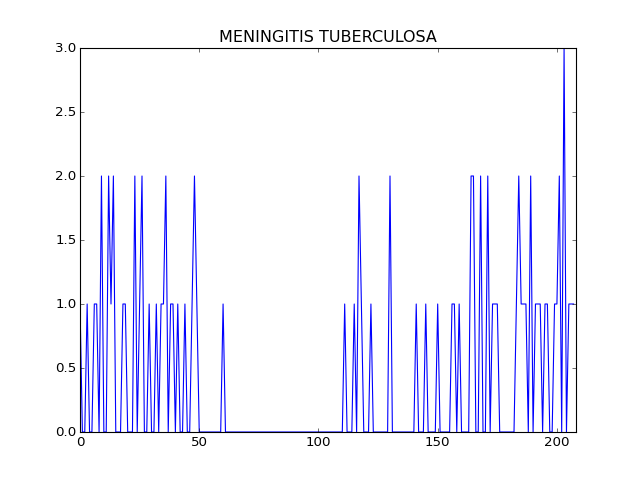

<IPython.core.display.Javascript object>


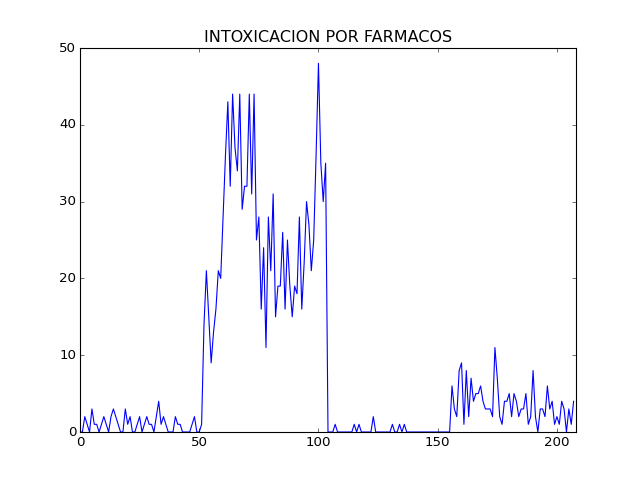

<IPython.core.display.Javascript object>


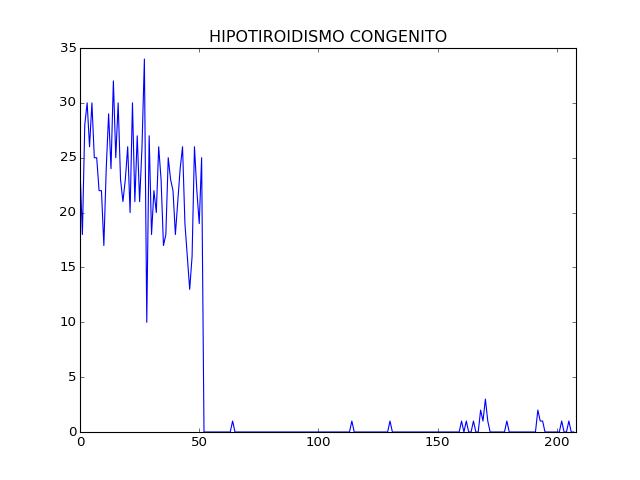

<IPython.core.display.Javascript object>


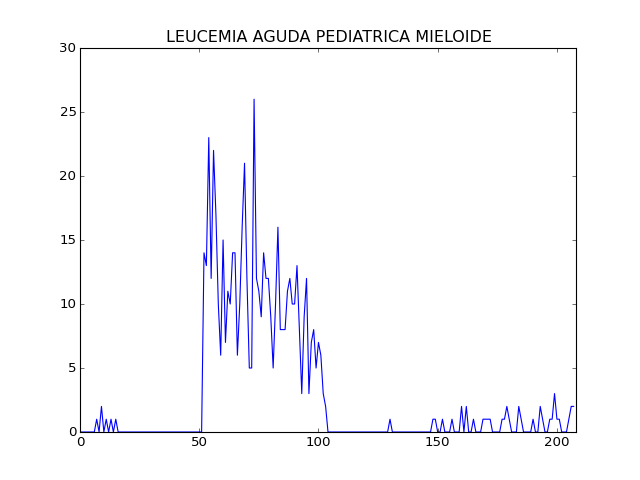

<IPython.core.display.Javascript object>


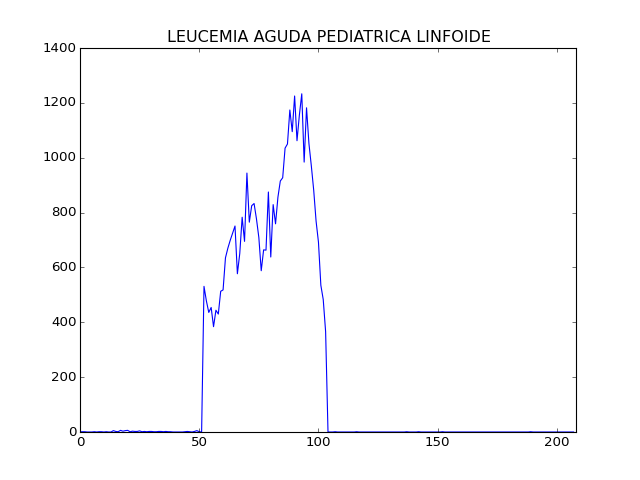

In [4]:
#Grafica todos los eventos desde 2009 a 2013 si se tienen datos en todos estos años
for i in range(UbiBog[0],FinBog[0]+1):
    Datos=np.array([])
    for j in range(1,len(Libros)):
        if MxLibros[0][i,2] in MxLibros[j][UbiBog[j]:FinBog[j],2]:
            Datos=np.concatenate((Datos,MxLibros[j][i,3:-1]))
        else:
            print 'No se encontro '+ MxLibros[0][i,2] + ' en ' + Archivos[j] 
            break
    plt.figure()
    plt.title(MxLibros[0][i,2])
    plt.xlim(0,len(Datos))
    plt.plot(range(len(Datos)),Datos);